In [7]:
# Basic tools
import pandas as pd
import numpy as np
import math
import datetime

# Web scraping and cleaning
import re
import json
import requests
from bs4 import BeautifulSoup

# Graph
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 0. Data loading

In [8]:
df = pd.read_csv('movie_metadata.csv')

# 1. Data wrangling

# [Cleaning step]

### Checking data's overall information

In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
df.shape

(5043, 28)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

###  Check missing values in columns or rows

In [13]:
# iterate each col; check how many null in each variable

for col in df:
    null = df[col].isnull().sum()
    if null > 0:
        print (col, null, '{0:.2%}'.format(float(null)/float(len(df))))

color 19 0.38%
director_name 104 2.06%
num_critic_for_reviews 50 0.99%
duration 15 0.30%
director_facebook_likes 104 2.06%
actor_3_facebook_likes 23 0.46%
actor_2_name 13 0.26%
actor_1_facebook_likes 7 0.14%
gross 884 17.53%
actor_1_name 7 0.14%
actor_3_name 23 0.46%
facenumber_in_poster 13 0.26%
plot_keywords 153 3.03%
num_user_for_reviews 21 0.42%
language 12 0.24%
country 5 0.10%
content_rating 303 6.01%
budget 492 9.76%
title_year 108 2.14%
actor_2_facebook_likes 13 0.26%
aspect_ratio 329 6.52%


In [15]:
# iterate each row; check how many null in each movie

for i in range(0, len(df)):
    row = df.iloc[i, :]
    null = row.isnull().sum()
    if null > 5:
        print (i, df.loc[i, 'movie_title'], null)

4 Star Wars: Episode VII - The Force Awakens              14
199 Harry Potter and the Deathly Hallows: Part II  6
206 Harry Potter and the Deathly Hallows: Part I  6
279 10,000 B.C.              15
459 Daredevil              6
543 Life              7
685 The Missing              7
833 Anger Management              6
962 Unforgotten              8
994 A Touch of Frost              6
1007 Twisted              7
1404 Rush Hour              6
1444 Hit the Floor              7
1510 Black Water Transit  6
1710 Trapped              6
1818 The Honeymooners              6
1947 Shaun the Sheep              6
2075 Rogue              7
2143 The Bachelor              10
2191 Meet the Browns              6
2241 Yu-Gi-Oh! Duel Monsters              11
2257 Fired Up              7
2303 Perception              6
2342 The Doombolt Chase              10
2370 Gone, Baby, Gone              8
2459 Unforgettable              9
2552 The Messengers              7
2702 The Dead Zone              6
2727 The Comp

### Duplicates removal

In [17]:
print ('There are {} duplicates in df'.format(df[df.duplicated()].shape[0]))

There are 45 duplicates in df


In [18]:
df = df.drop_duplicates()

In [19]:
print ('There are {} duplicates in df'.format(df[df.duplicated()].shape[0]))

There are 0 duplicates in df


### [Categorical variables]

### Proofread "movei title" column

In [21]:
df.movie_title = df.movie_title.str.replace('\xc2\xa0', '')

In [23]:
df.movie_title = df.movie_title.str.strip(' ')

### "color" column

In [24]:
# extra space in ' Black and White' object
df.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [25]:
df.color = df.color.str.replace(' Black and White', 'Black and White')
df.color.unique()

array(['Color', nan, 'Black and White'], dtype=object)

In [26]:
# filter "whole dataframe" based on "color is nan"
color_null = df[df.color.isnull()]

# Select title, year and color to decide what to fill for nan
# confirm 19 null are all color movies based on the year and title
color_null[['movie_title', 'title_year', 'color']]

,movie_title,title_year,color
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN
279,"10,000 B.C.",NaN,NaN
459,Daredevil,NaN,NaN
1948,Dear John,2010.0,NaN
2015,Red Sky,2014.0,NaN
2459,Unforgettable,NaN,NaN
2753,Shinjuku Incident,2009.0,NaN
3272,Into the Grizzly Maze,2015.0,NaN
3539,Alpha and Omega 4: The Legend of the Saw Tooth...,2014.0,NaN
3638,Snow Flower and the Secret Fan,2011.0,NaN


In [27]:
df.color = df.color.fillna(value='Color')

In [36]:
# turn to 0:black & white, 1:color

# reset index
df = df.reset_index(drop=True)

for i in range(0, len(df)):
    if df.loc[i, 'color'] == 'Color':
        df.loc[i, 'color'] = 1
    else:
        df.loc[i, 'color'] = 0

### "country" column

In [28]:
print ('There are {} NaN in country column'.format(df[df.country.isnull()].shape[0]))

There are 5 NaN in country column


In [40]:
# filter "whole df" based on "country == null"
# use language variable to confirm country variable manually

country_null = df[df.country.isnull()]
country_null[['movie_title', 'language', 'country', 'title_year']]


,movie_title,language,country,title_year
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN
276,"10,000 B.C.",NaN,NaN,NaN
2356,"Gone, Baby, Gone",English,NaN,NaN
3371,Preacher,English,NaN,NaN
3990,Dawn Patrol,English,NaN,2014.0


In [41]:
df.country = df.country.fillna(value='USA')

In [42]:
# turn to 0:other countries; 1:USA

# reset index
df = df.reset_index(drop=True)

for i in range(0, len(df)):
    if df.loc[i, 'country'] == 'USA':
        df.loc[i, 'country'] = 1
    else:
        df.loc[i, 'country'] = 0

In [43]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,1,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,0,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,1,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,0,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,0,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,1,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,0,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,1,NaN,NaN,NaN,12.0,7.1,NaN,0


### "language" column 

In [44]:
print ('There are {} NaN in country column'.format(df[df.language.isnull()].shape[0]))

There are 12 NaN in country column


In [45]:
# filter "whole df" based on "language is null"
language_null = df[df.language.isnull()]
language_null[['movie_title','language', 'country']]

,movie_title,language,country
4,Star Wars: Episode VII - The Force Awakens,NaN,1
276,"10,000 B.C.",NaN,1
2445,Unforgettable,NaN,1
3062,September Dawn,NaN,1
3511,Alpha and Omega 4: The Legend of the Saw Tooth...,NaN,1
3840,Silent Movie,NaN,1
4079,Love's Abiding Joy,NaN,1
4373,Kickboxer: Vengeance,NaN,1
4592,A Fine Step,NaN,1
4770,Intolerance: Love's Struggle Throughout the Ages,NaN,1


In [46]:
df.language = df.language.fillna(value='English')

In [47]:
print ('There are {} NaN in country column'.format(df[df.language.isnull()].shape[0]))

There are 0 NaN in country column


In [95]:
# turn to 0:non-English; 1:English

df = df.reset_index(drop=True)

for i in range(0, len(df)):
    if df.loc[i, 'language'] == 'English':
        df.loc[i, 'language'] = 1
    else:
        df.loc[i, 'language'] = 0

### Remove TV series based on “content_rating” column

In [48]:
# remove data whose "content_rating == TV- "
tv_index = df[(df.content_rating == 'TV-PG') | (df.content_rating == 'TV-14') | (df.content_rating == 'TV-MA') | (df.content_rating == 'TV-G') | (df.content_rating == 'TV-Y') | (df.content_rating == 'TV-Y7')].index
df = df.drop(tv_index)

In [53]:
print ('There are {} NaN in content_rating column'.format(len(df[df['content_rating'].isnull()])))

There are 301 NaN in content_rating column


### Scrape content_rating from IMDB website

In [67]:
# get movie links with "content_rating == null"
content_rating_null = df[df.content_rating.isnull()]
content_rating_null_linklist = list(content_rating_null['movie_imdb_link'])
len(content_rating_null_linklist)

301

#### [warming] DON"T RUN THIS. Codes for web scraping 

imdb_content_rating = {}
for link in content_rating_null_linklist:
    r = requests.get(link)
    text = r.text
    soup = BeautifulSoup(text)
    content_rating_location = soup.find(name='div', attrs={'class':'subtext'})
    if str(type(content_rating_location)) == "<class 'bs4.element.Tag'>":
        content_rating = content_rating_location.contents[0]
        imdb_content_rating[link] = content_rating
    else:
        imdb_content_rating[link] = np.NaN

#### [warming] DON"T RUN THIS. Already save the scraping results in 'imdb_content_rating.json'

with open('imdb_content_rating.json', 'w') as f:
    json.dump(imdb_content_rating, f)

In [79]:
# load the list of scraped data
with open('imdb_content_rating.json') as f:
    imdb_content_rating = json.load(f)

In [80]:
# since most of them are TV- series, I don't have to fill them into the data

### subgroup "content_rating" column into 4 groups

In [82]:
# check how many groups now
df.content_rating.unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'Not Rated', 'Unrated', 'Approved',
       'NC-17', 'X', 'GP', 'Passed', 'M'], dtype=object)

In [84]:
df = df.reset_index(drop=True)

for i in range(0, len(df)):
    if df.loc[i, 'content_rating'] == 'PG' or df.loc[i, 'content_rating'] == 'PG-13' or df.loc[i, 'content_rating'] == 'R':
        df.loc[i, 'content_rating'] = df.loc[i, 'content_rating']
    else:
        df.loc[i, 'content_rating'] = 'others'

In [85]:
# confirm it
df.content_rating.unique()

array(['PG-13', 'others', 'PG', 'R'], dtype=object)

In [86]:
# check the distribution beteen those groups
Counter(df.content_rating)

Counter({'PG-13': 1444, 'others': 684, 'PG': 698, 'R': 2098})

In [87]:
# dummify it and drop the original column
dummy = pd.get_dummies(df.content_rating, drop_first=True).astype(float)
df = pd.concat([df, dummy], axis=1)
df = df.drop('content_rating', axis=1)

### Dummify "generes" column

In [89]:
s = df['genres'].str.split('|', expand=False)
dummy_g = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
dummy_g = dummy_g.astype('float')

In [90]:
# merge dummified columns and drop the original column
df = pd.concat([df, dummy_g], axis=1)
df = df.drop('genres', axis=1)

### Replace "actor_name" columns to their frequency

In [92]:
actor = ['actor_1_name', 'actor_2_name', 'actor_3_name']
for i in actor:
    freq = Counter(df[i])
    df[i] = df[i].map(freq)

### Replace "director_name" column to their frequency

In [94]:
director_freq = Counter(df.director_name)
df.director_name = df.director_name.map(director_freq)

### Remove "plot_keywords" and "movie_title" columns, keep "imdb_movie_link" for further web scraping

In [97]:
unrelated_cat_col = ['plot_keywords', 'movie_title']
df= df.drop(unrelated_cat_col, axis=1)

# [Numeric variables]

### Fill in "title_year" column with web-scraped data and subgroup it

In [99]:
with open("imdb_titleyear.json") as f:
    imdb_titleyear = json.load(f)

In [100]:
# use imdb_link to fill title year
df.title_year = df.movie_imdb_link.map(imdb_titleyear).fillna(df.title_year)

#### [warming] DON"T RUN THIS. Look for null

title_year_null = df[df.title_year.isnull()]
title_year_null_linklist = list(title_year_null['movie_imdb_link'])

#### [warming] DON"T RUN THIS. Codes for web scraping 

imdb_titleyear = {}
for link in title_year_null_linklist:
    r = requests.get(link)
    text = r.text
    soup = BeautifulSoup(text)
    year_location = soup.find(name='h4', attrs={'class':'inline'}, string='Release Date:')
    if str(type(year_location)) == "<class 'bs4.element.Tag'>":
        year = year_location.find_previous()
        pattern = re.compile('\d\d\d\d')
        match = re.search(pattern, year.text.encode('utf-8'))
        imdb_titleyear[link] = int(match.group())
    else:
        imdb_titleyear[link] = np.NaN
        

#### [warming] DON"T RUN THIS. Already save the scraping results in 'imdb_titleyear.json'
with open('imdb_titleyear.json', 'w') as f:
    json.dump(imdb_titleyear, f)

In [173]:
# compare (gross - budget) before and after 1966

print((df[df['title_year'] > 1966]['gross'] - df[df['title_year'] > 1966]['budget']).mean())
print((df[df['title_year'] < 1966]['gross'] - df[df['title_year'] < 1966]['budget']).mean())

5273976.408422627
20991681.890243903


In [175]:
# seperate title_year into 2 groups 1: before 1966; 0: after 1966

df.reset_index(drop=True)

for i in range(len(df)):
    if df.loc[i, 'title_year'] > 1966:
        df.loc[i, 'title_year'] = 0
    else:
        df.loc[i, 'title_year'] = 1

### Fill in "budget" column with web-scraped data

In [102]:
with open("imdb_budget.json") as f:
    imdb_budget = json.load(f)

In [103]:
# 1. Find a match with imdb_budget dict. by map() in imdb link column
# 2. fillna() in budget column
df.budget = df.movie_imdb_link.map(imdb_budget).fillna(df.budget)

#### [warming] DON"T RUN THIS. Look for null

budget_null = df[df.budget.isnull()]
budget_null_linklist = list(budget_null['movie_imdb_link'])

#### [warming] DON"T RUN THIS. Codes for web scraping 

%%time
imdb_budget = {}
for link in budget_null_linklist:
    r = requests.get(link)
    text = r.text
    soup = BeautifulSoup(text)
    budget_location = soup.find(name='h4', attrs={'class':'inline'}, string='Budget:')
    if str(type(budget_location)) == "<class 'bs4.element.Tag'>":
        budget = budget_location.find_previous()
        imdb_budget[link] = float(filter(str.isdigit, budget.text.encode('utf-8')))
    else:
        imdb_budget[link] = np.NaN

#### [warming] DON"T RUN THIS. Already save the scraping results in 'imdb_budget.json'

with open('imdb_budget.json', 'w') as f:
    json.dump(imdb_budget, f)

### Fill in "gross" columns with web-scraped data

In [107]:
with open("imdb_gross.json") as f:
    imdb_gross = json.load(f)

In [108]:
df.gross = df.movie_imdb_link.map(imdb_gross).fillna(df.gross)

In [116]:
# When I scrape the web, I fill in "wrong url" if there is no information for scrapping
# change 'wrong url' to NaN
df.gross = df.gross.replace('wrong url', np.NaN)

#### [warming] DON"T RUN THIS. Look for null

gross_null = df[df.gross.isnull()]
gross_null_linklist = list(gross_null['movie_imdb_link'])

#### [warming] DON"T RUN THIS. Codes for web scraping 
%%time
imdb_gross = {}
for link in gross_null_linklist:
    r = requests.get(link)
    text = r.text
    soup = BeautifulSoup(text)
    gross_location = soup.find(name='h4', attrs={'class':'inline'}, string='Gross USA:')
    if str(type(gross_location)) == "<class 'bs4.element.Tag'>":
        gross = gross_location.find_previous()
        pattern = re.compile('\$(.*)\W +')
        match = re.search(pattern, gross.text.encode('utf-8'))
        imdb_gross[link] = float(filter(str.isdigit, match.group()))
    else:
        imdb_gross[link] = np.NaN

#### [warming] DON"T RUN THIS. Already save the scraping results in 'imdb_titleyear.json'
with open('imdb_gross.json') as f:
    imdb_gross = json.load(f)

### Add "month" column by web-scraped data

In [110]:
with open('imdb_month.json', 'r') as f:
    imdb_month = json.load(f)

In [128]:
# add month data points
df['month'] = df.movie_imdb_link.map(imdb_month)

In [129]:
# clean up 
df.loc[:, 'month'] = df['month'].str[0]
df.loc[:, 'month'] =df.loc[:, 'month'].str.replace('\d+ ', '')

In [130]:
# subgroup "month" column into 0:non-popular seasons; 1:popular seasons (June and Dec)
# since month only has ~3500 data points I assume those NaN are all non-popular season

df = df.reset_index(drop=True)

for i in range(0, len(df)):
    if df.loc[i, 'month'] == 'June' or df.loc[i, 'month'] == 'December':
        df.loc[i, 'month'] = 1
    else:
        df.loc[i, 'month'] = 0

#### [warming] DON"T RUN THIS. Get whole links and split into chunks
df_linklist = list(df.movie_imdb_link)

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in xrange(0, len(l), n):
        yield l[i:i + n]
        
date_split1 = list(chunks(df_linklist[11:2000], 300))
date_split2 = list(chunks(df_linklist[2001:], 300))

#### Define a function to grab month based in links

def get_month(linklist, destination, original_dic):
    for link in linklist:
        r = requests.get(link)
        text = r.text
        soup = BeautifulSoup(text)
        month_location = soup.find(name='h4', attrs={'class':'inline'}, string='Release Date:')
        if str(type(month_location)) == "<class 'bs4.element.Tag'>":
            month = month_location.find_previous()
            pattern = re.compile('\d +(.*) +\d\d\d\d')
            match = re.findall(pattern, month.text.encode('utf-8'))
            if str(type(match)) == "<type '_sre.SRE_Match'>":
                destination[link] = match
                original_dic.update(destination)
            elif:
                pattern_backup = re.compile('\W +(.*) +\d\d\d\d')
                match = re.findall(pattern_backup, month.text.encode('utf-8'))
                destination[link] = match
                original_dic.update(destination)
            else:
                destination[link] = np.NaN
        else:
            destination[link] = np.NaN

#### [warming] DON"T RUN THIS. Codes for web scraping 
            
imdb_month = {}
temp={}
for i in date_split1:
    get_month(i, temp, imdb_month)

####  [warming] DON"T RUN THIS. Already save the scraping results in 'imdb_month.json'

with open('imdb_month.json', 'w') as f:
    json.dump(imdb_month, f)

### Impute "num_critic_for_reviews", "director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "facenumber_in_poster", "actor_2_facebook_likes", "aspect_ratio", "duration", "num_user_for_reviews" with median

In [119]:
# iterate each col; check how many null in each variable

for col in df:
    null = df[col].isnull().sum()
    if null > 0:
        print (col, null, '{0:.2%}'.format(float(null)/float(len(df))))

num_critic_for_reviews 46 0.93%
duration 14 0.28%
director_facebook_likes 39 0.79%
actor_3_facebook_likes 23 0.47%
actor_1_facebook_likes 7 0.14%
gross 582 11.82%
facenumber_in_poster 13 0.26%
num_user_for_reviews 20 0.41%
budget 389 7.90%
actor_2_facebook_likes 13 0.26%
aspect_ratio 323 6.56%


In [143]:
# median imputation

from sklearn.preprocessing import Imputer
# change it to "from sklearn import impute.SimpleImputer" after 0.22 version

imr = Imputer(missing_values='NaN', strategy='median', axis=0)
impute_col = ["num_critic_for_reviews", "director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "facenumber_in_poster", "actor_2_facebook_likes", "aspect_ratio", "duration", "num_user_for_reviews"]
for i in impute_col:
    df[i] = imr.fit_transform(df[[i]]).ravel()

/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# [Final steps]

### Remove "movie_imdb_link" column

In [155]:
df = df.drop("movie_imdb_link", axis=1)

### Remove all rows with NaN

In [179]:
df = df.dropna()

### Save it into .csv file

In [181]:
df.to_csv('final_wrangle.csv')

# 2. Data preprocessing

### Prepare target variable: revenue

In [186]:
# create a copy of 'final_wrangle.csv' for this section
df_pre = df.copy()

# add revenue column
df_pre['revenue'] = df_pre.gross - df_pre.budget

# change unit to 1 million
df_pre.budget = df_pre['budget'] / 1000000
df_pre.gross = df_pre['gross'] / 1000000
df_pre.revenue = df_pre['revenue'] / 1000000

### Outliers and correlation 

In [224]:
# check columns not genres
df_pre.iloc[0:5, 0:23]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,7,723.0,178.0,0.0,855.0,4,1000.0,760.505847,4,886204,4834,3,0.0,3054.0,1,1,237.0,0.0,936.0,7.9,1.78,33000
1,0,7,302.0,169.0,563.0,1000.0,7,40000.0,309.404152,40,471220,48350,4,0.0,1238.0,1,1,300.0,0.0,5000.0,7.1,2.35,0
2,0,8,602.0,148.0,0.0,161.0,2,11000.0,200.074175,4,275868,11700,1,1.0,994.0,1,0,245.0,0.0,393.0,6.8,2.35,85000
3,0,8,813.0,164.0,22000.0,23000.0,5,27000.0,448.130642,11,1144337,106759,2,0.0,2701.0,1,1,250.0,0.0,23000.0,8.5,2.35,164000
5,0,3,462.0,132.0,475.0,530.0,3,640.0,73.058679,2,212204,1873,1,1.0,738.0,1,1,263.7,0.0,632.0,6.6,2.35,24000


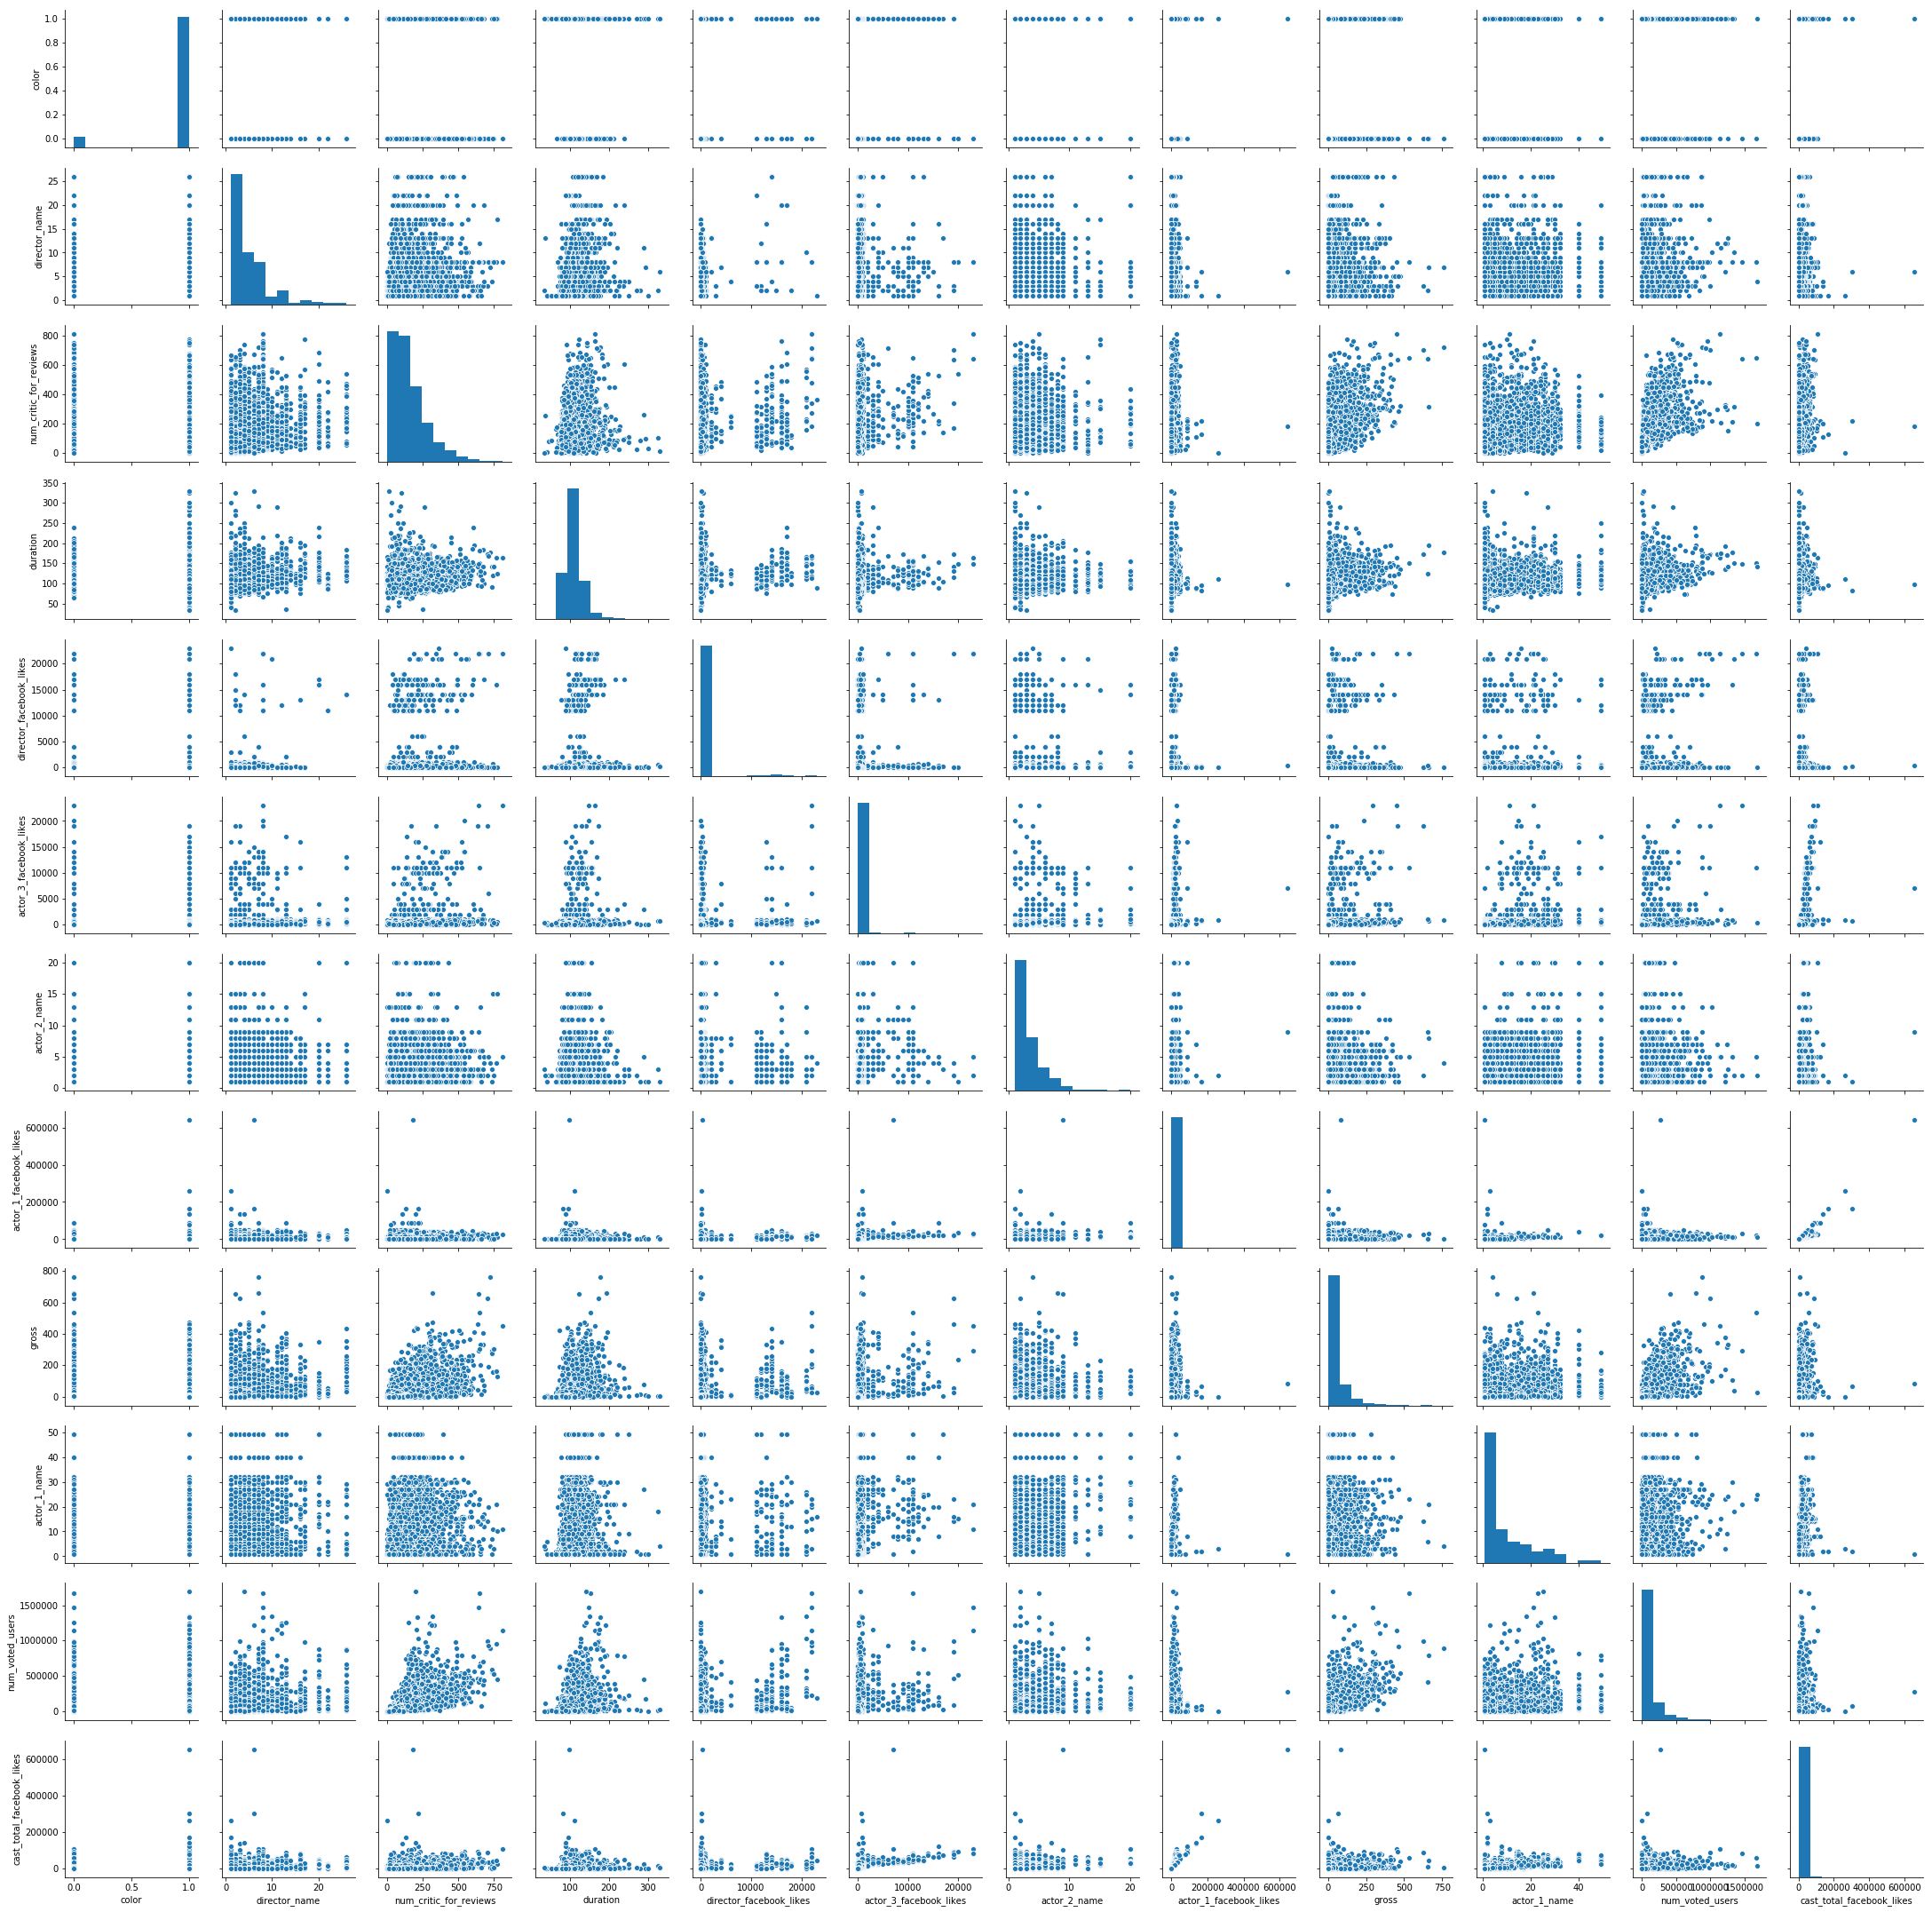

In [222]:
# check outliers in histograms (first 12 columns) by sns.pairplot
sns.pairplot(df_pre.iloc[:, 0:12])

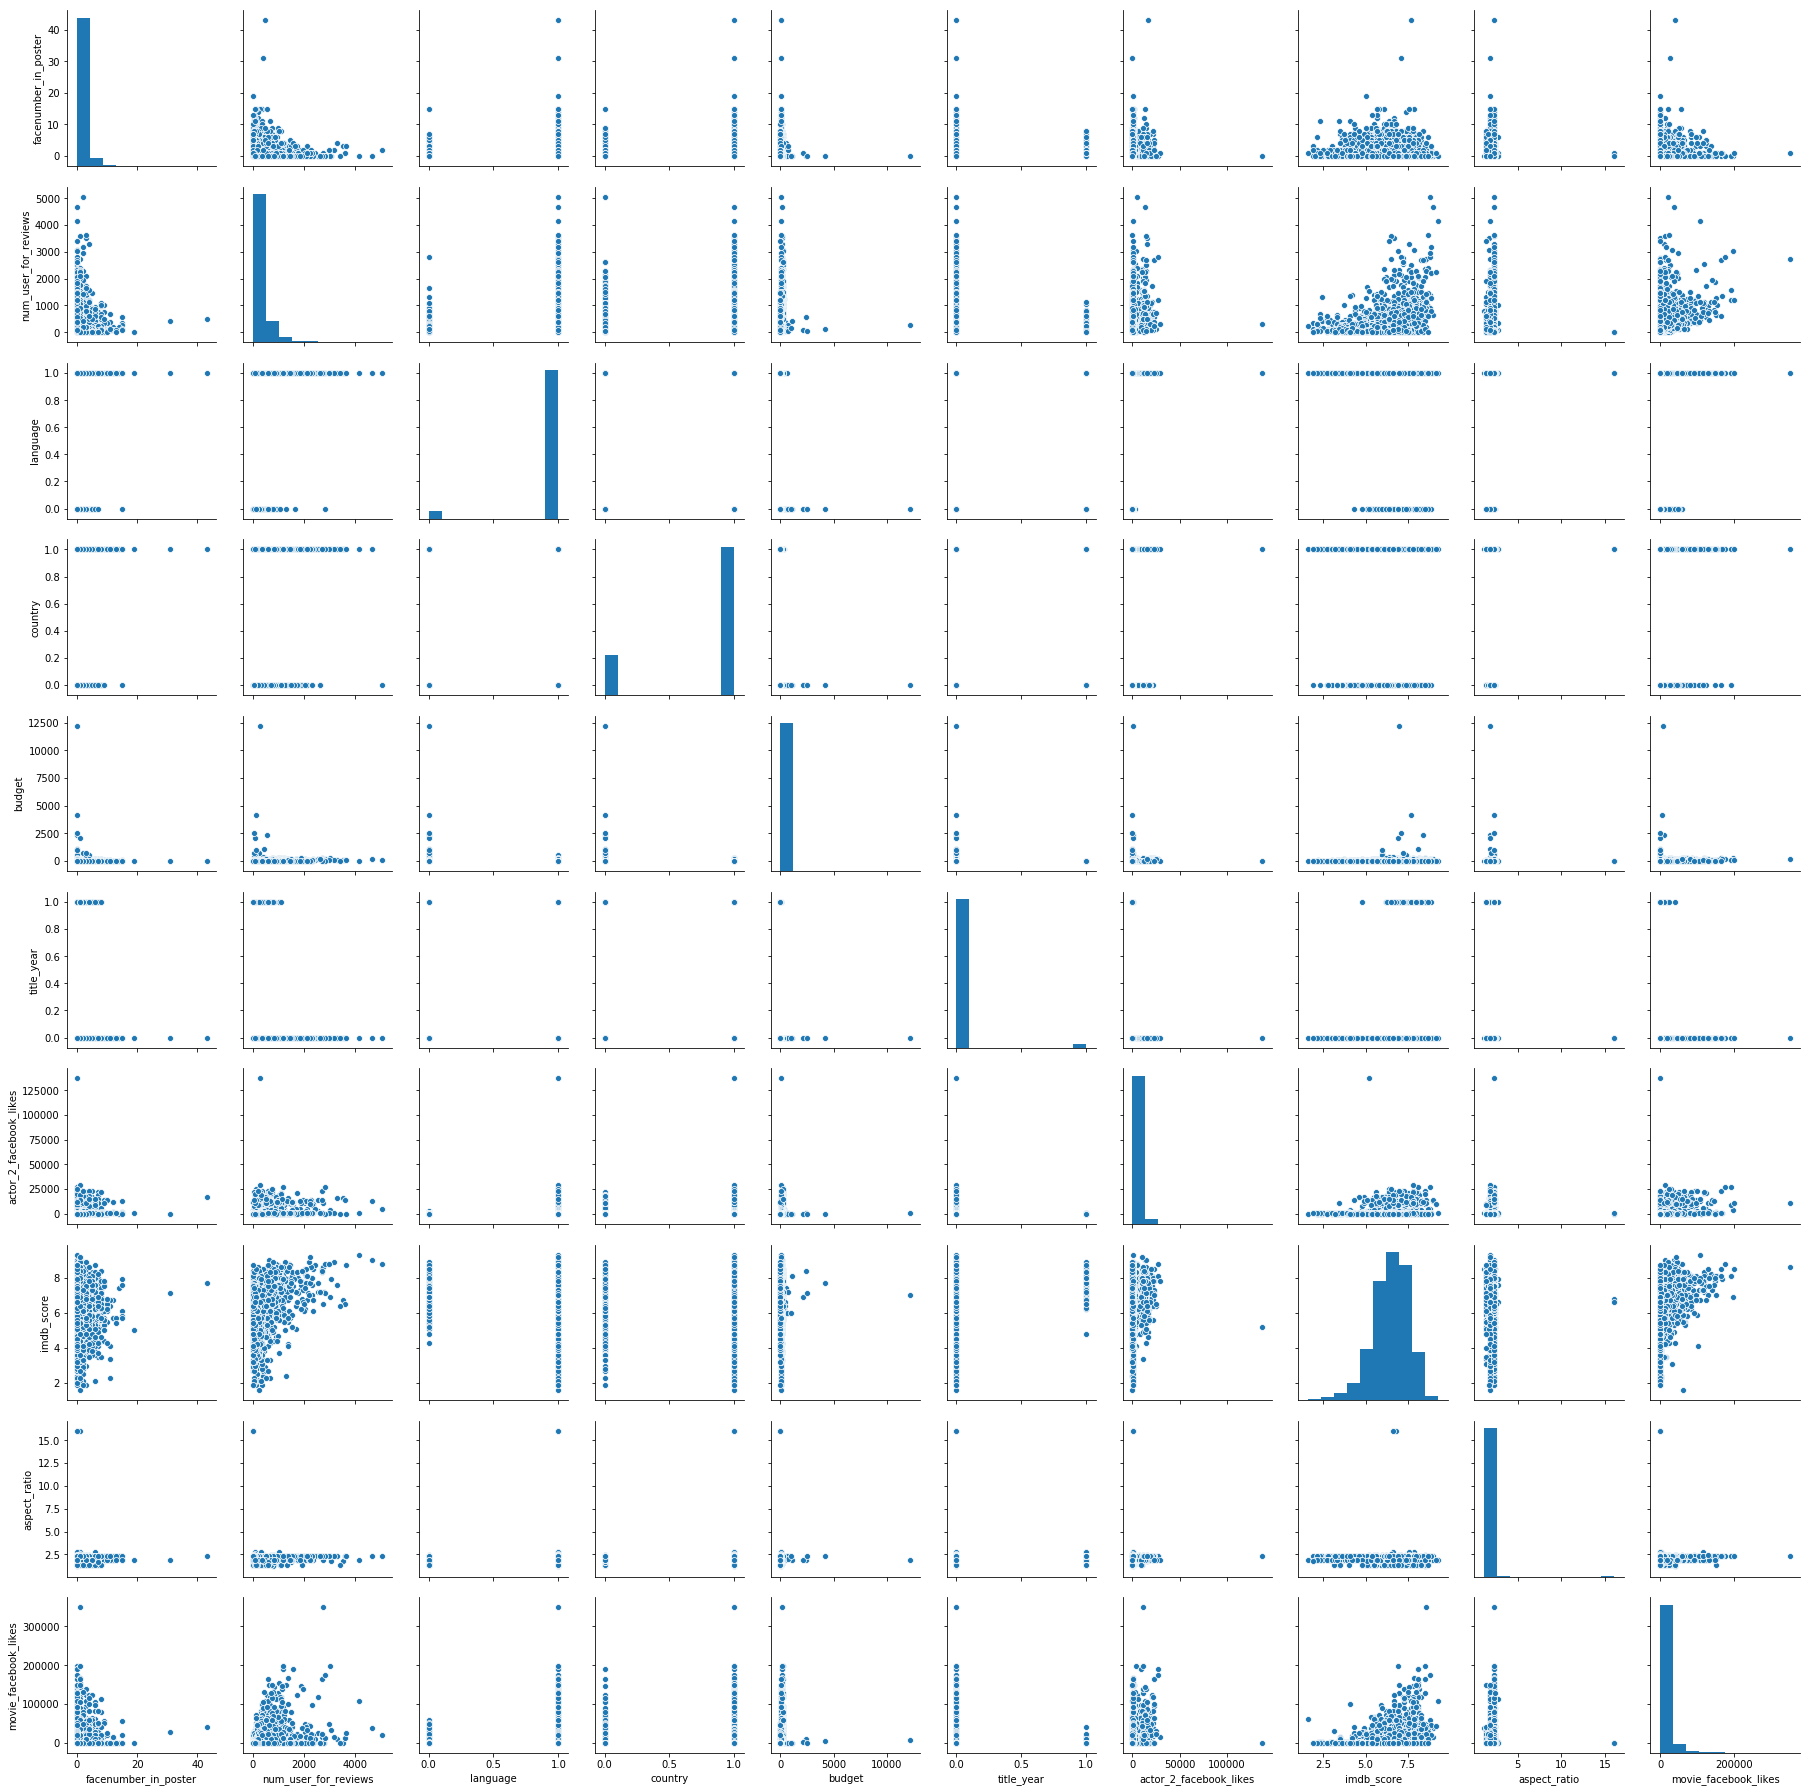

In [225]:
# check outliers in histograms (first 13 to 23 columns) by sns.pairplot
sns.pairplot(df_pre.iloc[:, 13:23])

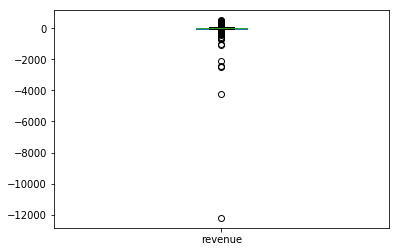

In [226]:
# There is no obvious outliers in histograms
# Check ourliers of our target variable (revenue) 
df_pre['revenue'].plot(kind='box')

In [227]:
# remove outliers in negative revenue
# roughly set a boundary for outlier from the boxplot 
df_pre_rev = df_pre[(df_pre.revenue > -400)]

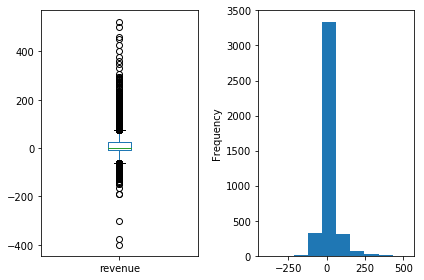

In [231]:
# check boxplot and histogram after outliers removal
plt.subplot(1, 2, 1)
df_pre_rev['revenue'].plot(kind='box')

plt.subplot(1, 2, 2)
df_pre_rev['revenue'].plot(kind='hist')

plt.tight_layout()

In [242]:
Counter(df_pre['Game-Show'])

Counter({0.0: 4099})

### Correlation

In [247]:
cor = df_pre_rev.corr()

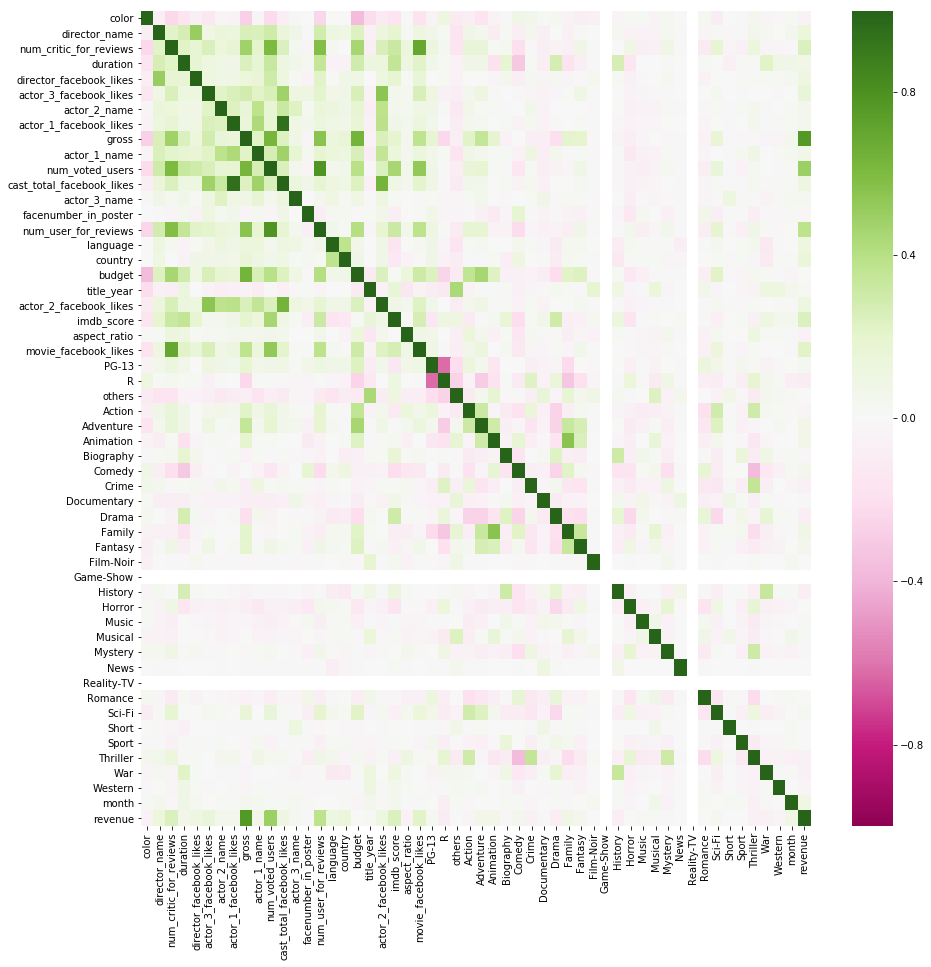

In [248]:
plt.figure(figsize=(15, 15))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, cmap='PiYG', vmax=1, vmin=-1) 
# Put annotation in the heatmap by two parameters: annot=True, annot_kws={"size": 10}

In [249]:
# check the highest coreelation between two features
for i in cor.columns:
    for j in cor.index:
        if (cor.loc[j, i] > 0.8) & (cor.loc[j, i] < 1):
            print ('high correlation is {}'.format(i + ' / ' + j))
        if (cor.loc[j, i] < -0.8) & (cor.loc[j, i] > -1):
            print ('low correlation is {}'.format(i + ' / ' + j))

high correlation is actor_1_facebook_likes / cast_total_facebook_likes
high correlation is cast_total_facebook_likes / actor_1_facebook_likes


Text(0, 0.5, 'cast_tottal_facebook_likes')

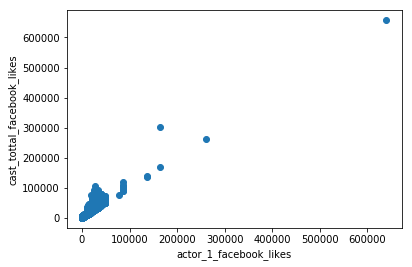

In [203]:
# check them in the scatter plot
plt.scatter(x=df_pre.actor_1_facebook_likes, y=df_pre.cast_total_facebook_likes)
plt.xlabel('actor_1_facebook_likes')
plt.ylabel('cast_tottal_facebook_likes')

In [250]:
# remove actor_1_facebook_likes
df_pre_rev = df_pre_rev.drop('actor_1_facebook_likes', axis=1)

# [Save the preprocessed data into final_pre.csv]

In [251]:
df_pre_rev.to_csv('final_pre.csv')